Breast Cancer Prediction Model

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error

Decision Tree Model(made by Yash Aggarwal)

In [32]:
#Loading the Breast Cancer Data 
data= pd.read_csv('breast-cancer-wisconsin-data_data.csv')

#displaying contents of the dateset
print(data.head())
data.tail()

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [33]:
x=data.iloc[:, 2:32]
y=data.iloc[:, 1]
x,y

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      compactness_mean  concavity_mean  concave po

In [34]:
lb= LabelEncoder()
ly= lb.fit_transform(y)
ly

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [35]:
#splitting data into training and testing sets 
x_train, x_test, y_train, y_test= train_test_split(x, ly, test_size= 0.2, random_state= 42)

print(f"Training Set Size:", x_train.shape)
print(f'Test Set Size:', x_test.shape)

Training Set Size: (455, 30)
Test Set Size: (114, 30)


In [36]:
#training the model
model1= tree.DecisionTreeClassifier(criterion='entropy', random_state= 42)
model1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [37]:
#Making Predictions
y_pred= model1.predict(x_test)

In [38]:
#Evaluating Model
accuracy1= accuracy_score(y_test, y_pred)
print('Accuracy score for the following model is:', accuracy1)

matrix1= confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(matrix1)

report1= classification_report(y_test, y_pred)
print(f'The report for tlhe following model is:')
print(report1)

Accuracy score for the following model is: 0.9473684210526315
Confusion Matrix
[[70  1]
 [ 5 38]]
The report for tlhe following model is:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



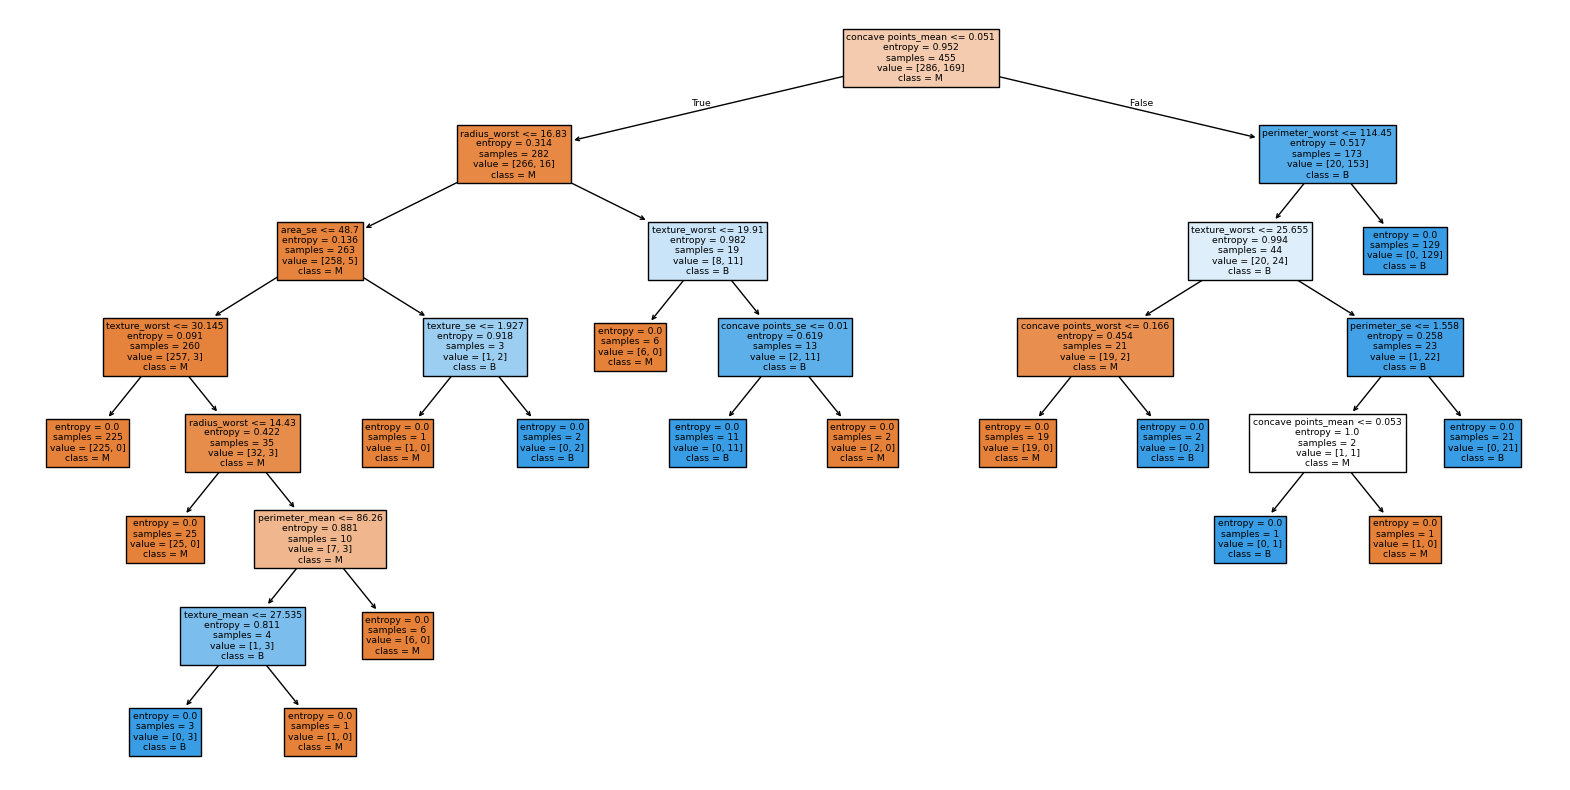

In [39]:
#plotting a decision tree 
plt.figure(figsize=(20,10))
tree.plot_tree(model1, feature_names= x.columns, class_names=[str(cls) for cls in y.unique()], filled=True)
plt.show()

Random Forest Classification (By Swayam Bansal)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
#Creating a Random Forest classifier
model2= RandomForestClassifier(criterion='entropy',n_estimators= 100)

#train the model by the above taken datasets
model2.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [42]:
#Prediction of the output by the use of RF Classifier
y_pred = model2.predict(x_test)

In [43]:
#Evaluating the model 
accuracy2= accuracy_score(y_test, y_pred)
print('The Accuracy Score for this model is:', accuracy2)

matrix2= confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(matrix2)

report2= classification_report(y_test, y_pred)
print('The Classification Report:')
print(report2)

The Accuracy Score for this model is: 0.9649122807017544
Confusion Matrix
[[70  1]
 [ 3 40]]
The Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



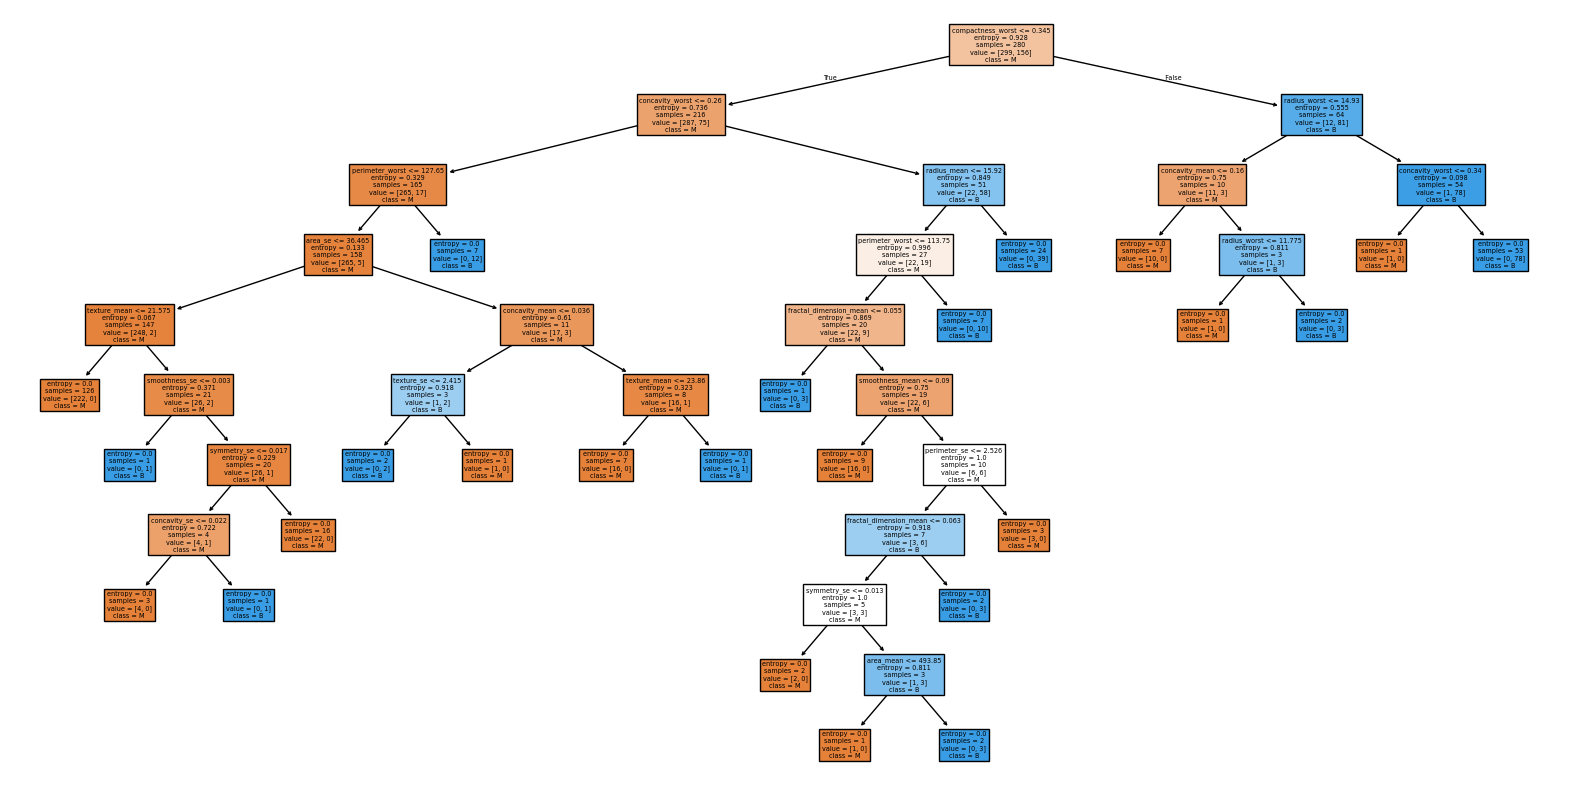

In [44]:
plt.figure(figsize=(20,10))
tree.plot_tree(model2.estimators_[2], feature_names= x.columns, class_names=[str(cls) for cls in y.unique()], filled=True)
plt.show()

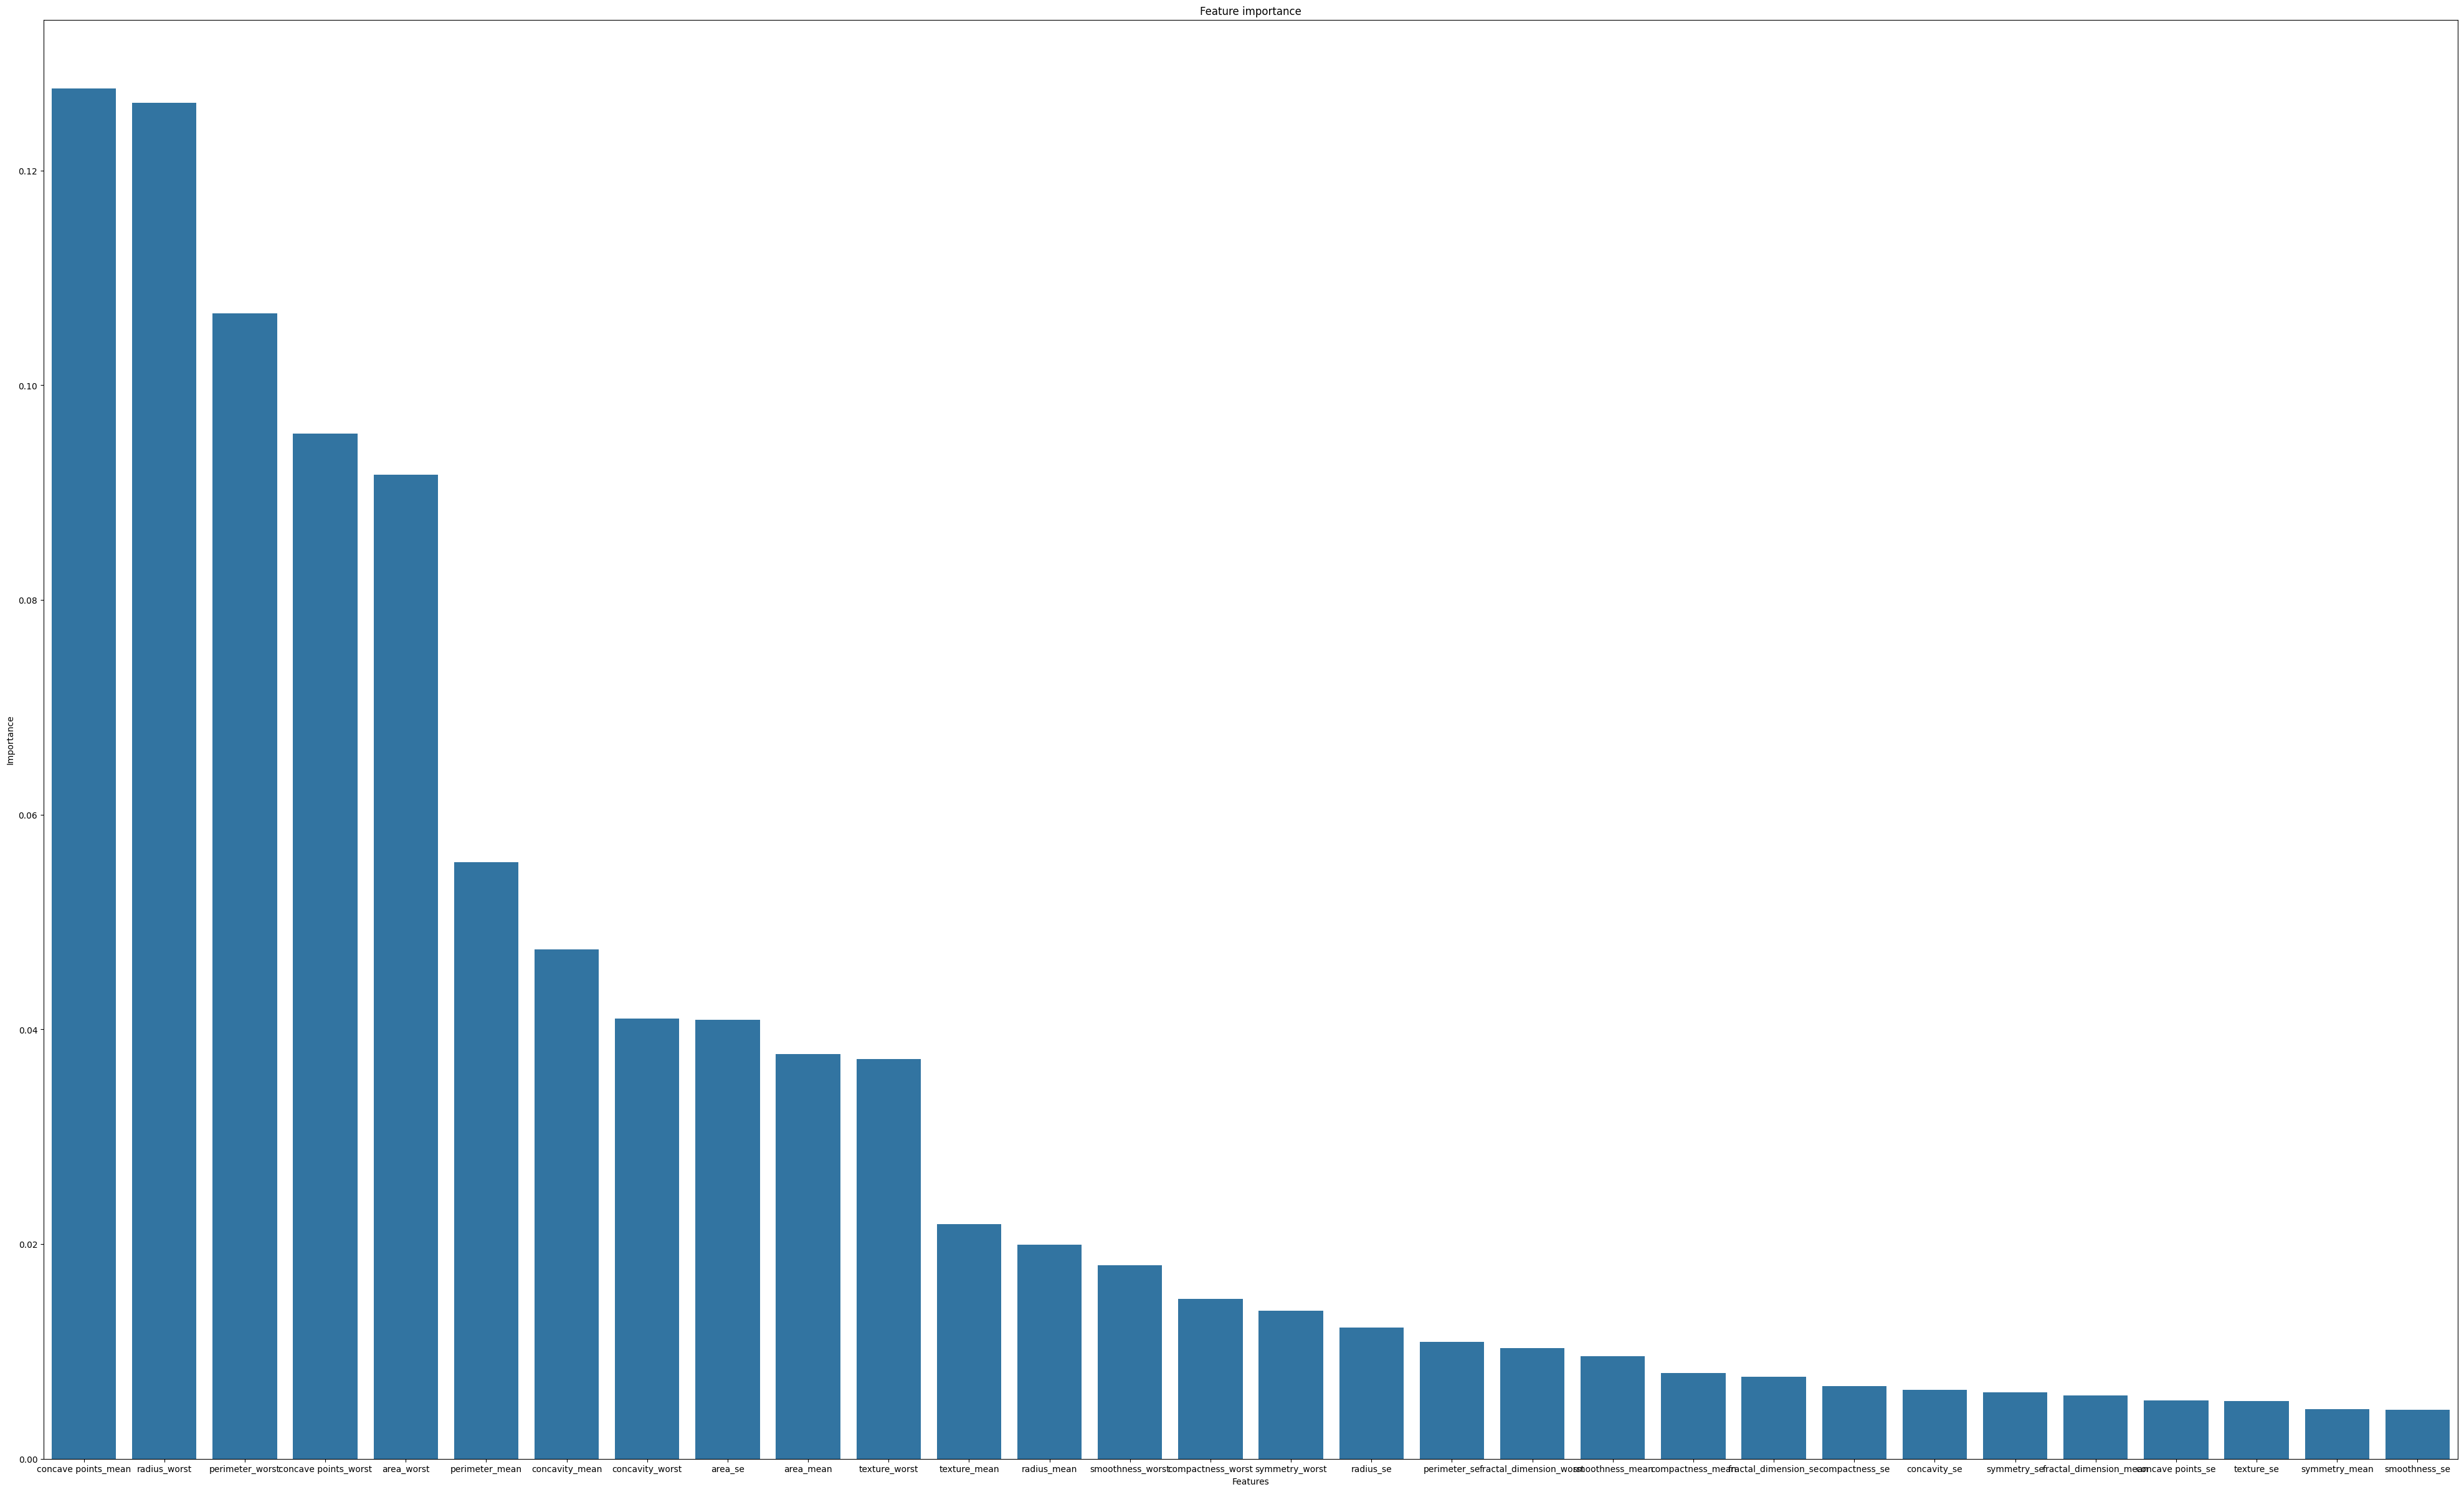

In [45]:
feature_imp= model2.feature_importances_
imp_df= pd.DataFrame({'Features': x.columns, 'Importance':feature_imp}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(50,30))
sns.barplot(x='Features', y='Importance', data= imp_df)
plt.title('Feature importance')
plt.show()

SVC Model (By Saurabh Sharma)

In [46]:
#importing the SVC model
from sklearn.svm import SVC
model3 = SVC(kernel='linear')
model3.fit(x_train, y_train)

#predicting the value by this model 
y_pred= model3.predict(x_test)

In [47]:
#Evaluating the model
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
accuracy3= accuracy_score(y_test, y_pred)
matrix3= confusion_matrix(y_test, y_pred)
report3= classification_report(y_test, y_pred)

print("Mean squared error of the model", mse)
print("R Squared score of the model", r2)
print("The accuracy score of the model", accuracy3)
print("Confusion matrix")
print(matrix3)
print("Classification report of the model")
print(report3) 

Mean squared error of the model 0.043859649122807015
R Squared score of the model 0.8132983950212905
The accuracy score of the model 0.956140350877193
Confusion matrix
[[70  1]
 [ 4 39]]
Classification report of the model
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



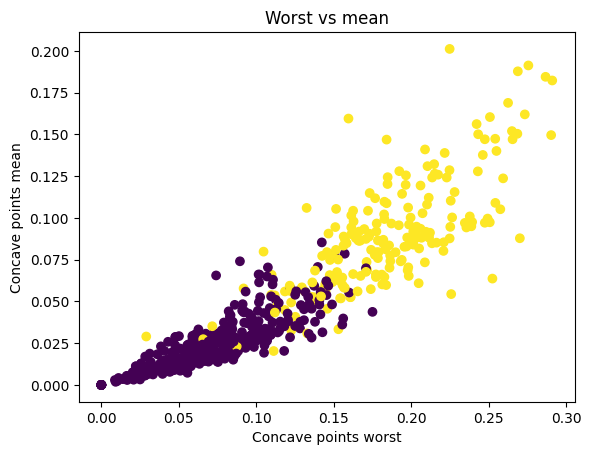

In [48]:
#plotting the graph between the major features of the model 
x= data.iloc[:, 2:32].values
y= data.iloc[:, 1].values
plt.scatter(x[:, 27], x[:, 7], c=ly)
plt.xlabel('Concave points worst')
plt.ylabel('Concave points mean')
plt.title('Worst vs mean')
plt.show()

Neural Network Model(By Arjav Jain)

In [49]:
#Importing Tensorflow for the usage of Neural Network 
import tensorflow as tf 
from keras.models import Sequential

In [52]:
# Split the data into features and target variable
from sklearn.preprocessing import StandardScaler
X = data.drop('diagnosis', axis=1)
Y = data['diagnosis']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Saurabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Saurabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Saurabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [53]:
# Define the neural network model
model4 =Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\Saurabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
# Compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6336 - loss: 0.6928 - val_accuracy: 0.6957 - val_loss: 0.6909
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6535 - loss: 0.6911 - val_accuracy: 0.6957 - val_loss: 0.6888
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6232 - loss: 0.6902 - val_accuracy: 0.6957 - val_loss: 0.6869
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6424 - loss: 0.6883 - val_accuracy: 0.6957 - val_loss: 0.6848
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6564 - loss: 0.6863 - val_accuracy: 0.6957 - val_loss: 0.6830
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5875 - loss: 0.6886 - val_accuracy: 0.6957 - val_loss: 0.6813
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6058 - loss: 0.6867 - val_accuracy: 0.6957 - val_loss: 0.6795
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5933 - loss: 0.6867 - val_accuracy: 0.6957 - val_loss

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Evaluate the model
y_pred = (model4.predict(X_test)>0.5).astype("int32")

# Calculate performance metrics
accuracy4 = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy4:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Accuracy: 0.6228
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


C:\Users\Saurabh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

NameError: name 'history' is not defined

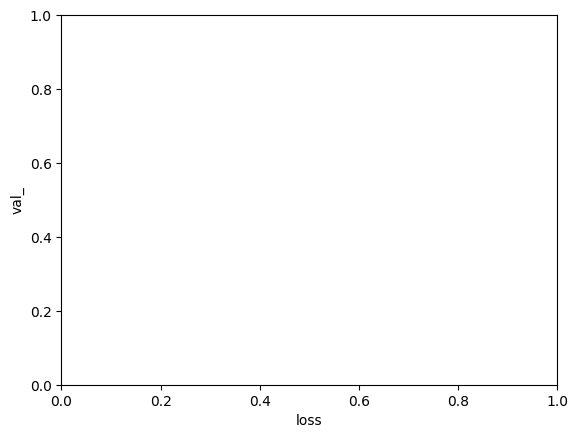

In [29]:
plt.xlabel('loss')
plt.ylabel('val_')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Evaluating the most accurate model 

In [30]:
if((accuracy1>=accuracy2) and (accuracy1>=accuracy3) and (accuracy1>=accuracy4)):
    print('Decision tree model is better')
elif((accuracy2>=accuracy1) and (accuracy2>=accuracy3) and (accuracy2>=accuracy4)):
    print('Random forest model is better')
elif((accuracy3>=accuracy1) and (accuracy3>=accuracy2) and (accuracy3>=accuracy4)):
    print('SVC model is better')
else:
    print('Neural Network model is better')

NameError: name 'accuracy4' is not defined